<a href="https://colab.research.google.com/github/madasusaikrishna2005-hash/myprograms/blob/master/MACHINELEARNING_WORKSHOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Identifying business problem

- to predict delivery time prediction based upon factors like weather, traffic, vehicle,etc..


Load data set


- import all required libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("swiggy_cleaned.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd

In [ ]:
df.head()

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,24.0,INDO,19.0,3.0,saturday,1.0,15.0,11.0,morning,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,33.0,BANG,25.0,3.0,friday,0.0,5.0,19.0,evening,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,26.0,BANG,19.0,3.0,saturday,1.0,15.0,8.0,morning,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,21.0,COIMB,5.0,4.0,tuesday,0.0,10.0,18.0,evening,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,30.0,CHEN,26.0,3.0,saturday,1.0,15.0,13.0,afternoon,6.210138


In [ ]:
df.tail()

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
17699,SURRES05DEL03,27.0,4.5,21.175104,72.804342,21.205104,72.834342,2022-03-09,sandstorms,jam,...,17.0,SUR,9.0,3.0,wednesday,0.0,5.0,20.0,night,4.560903
17700,INDORES010DEL01,26.0,4.9,22.750040,75.902847,22.760040,75.912847,2022-04-01,sandstorms,low,...,10.0,INDO,1.0,4.0,friday,0.0,10.0,10.0,morning,1.512575
17701,INDORES09DEL02,29.0,3.5,22.725835,75.887648,22.805835,75.967648,2022-03-29,sunny,low,...,42.0,INDO,29.0,3.0,tuesday,0.0,5.0,23.0,night,12.100157
17702,MUMRES12DEL02,36.0,4.8,19.207222,72.972281,19.337222,73.102281,2022-03-23,stormy,low,...,18.0,MUM,23.0,3.0,wednesday,0.0,10.0,22.0,night,19.878390
17703,CHENRES17DEL02,38.0,4.6,13.045479,80.233110,13.095479,80.283110,2022-03-26,sunny,jam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17704 entries, 0 to 17703
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rider_id              17704 non-null  object 
 1   age                   17018 non-null  float64
 2   ratings               16998 non-null  float64
 3   restaurant_latitude   16286 non-null  float64
 4   restaurant_longitude  16286 non-null  float64
 5   delivery_latitude     16286 non-null  float64
 6   delivery_longitude    16286 non-null  float64
 7   order_date            17704 non-null  object 
 8   weather               17492 non-null  object 
 9   traffic               17498 non-null  object 
 10  vehicle_condition     17704 non-null  int64  
 11  type_of_order         17704 non-null  object 
 12  type_of_vehicle       17703 non-null  object 
 13  multiple_deliveries   17331 non-null  float64
 14  festival              17631 non-null  object 
 15  city_type          

In [ ]:
df.describe()

,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,vehicle_condition,multiple_deliveries,time_taken,order_day,order_month,is_weekend,pickup_time_minutes,order_time_hour,distance
count,17018.000000,16998.000000,16286.000000,16286.000000,16286.000000,16286.000000,17704.000000,17331.000000,17703.000000,17703.000000,17703.000000,17703.000000,17093.000000,17093.000000,16285.000000
mean,29.567164,4.634863,18.874084,76.974764,18.937511,77.038191,1.028694,0.746639,26.349715,13.783370,2.978761,0.274586,9.947932,17.414146,9.684441
std,5.766009,0.312255,5.481971,3.520337,5.483792,3.520509,0.834542,0.567564,9.400989,8.684493,0.549957,0.446318,4.075218,4.794802,5.581109
min,20.000000,2.500000,9.957144,72.768726,9.967144,72.778726,0.000000,0.000000,10.000000,1.000000,2.000000,0.000000,5.000000,0.000000,1.465067
25%,25.000000,4.500000,12.981615,73.899315,13.062161,73.955647,0.000000,0.000000,19.000000,6.000000,3.000000,0.000000,5.000000,15.000000,4.657620
50%,30.000000,4.700000,19.065838,76.625861,19.115831,76.677889,1.000000,1.000000,26.000000,13.000000,3.000000,0.000000,10.000000,19.000000,9.192951
75%,35.000000,4.900000,22.751234,78.375467,22.820040,78.414165,2.000000,1.000000,32.000000,20.000000,3.000000,1.000000,15.000000,21.000000,13.631340
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000,31.000000,4.000000,1.000000,15.000000,23.000000,20.969489


In [ ]:
df.describe(include = "O")

,rider_id,order_date,weather,traffic,type_of_order,type_of_vehicle,festival,city_type,city_name,order_day_of_week,order_time_of_day
count,17704,17704,17492,17498,17704,17703,17631,17250,17703,17703,17703
unique,1316,44,6,4,4,4,2,3,22,7,5
top,COIMBRES02DEL01,2022-04-01,fog,low,snack,motorcycle,no,metropolitian,JAP,wednesday,night
freq,34,472,2982,5995,4511,10229,17260,13235,1312,2773,7092


EDA


In [ ]:
#unique
df.weather.unique()

array(['sunny', 'stormy', 'sandstorms', 'cloudy', 'fog', 'windy', nan],
      dtype=object)

<Axes: xlabel='weather', ylabel='count'>

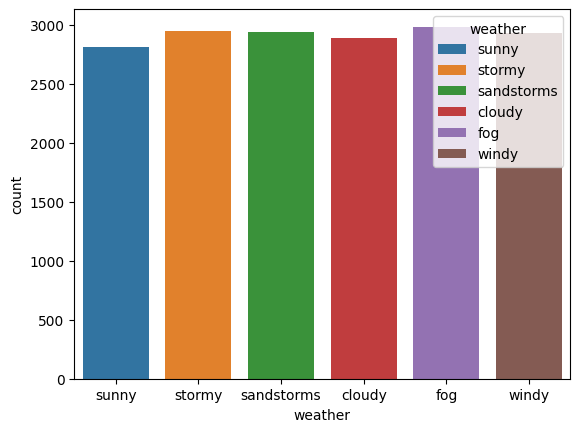

In [ ]:
#viz
#counplot
sns.countplot(data =  df, x = "weather", hue = "weather")

<Axes: xlabel='age'>

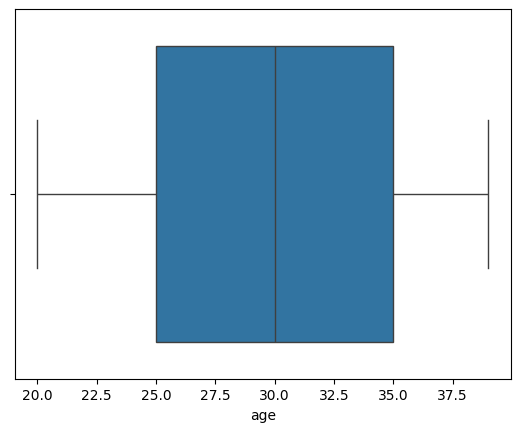

In [ ]:
sns.boxplot(data = df, x = "age")

<Axes: xlabel='ratings'>

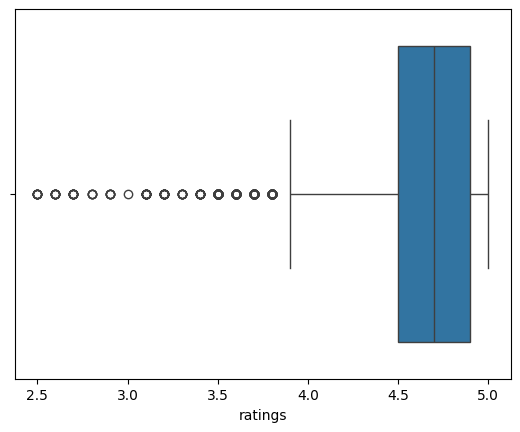

In [ ]:
sns.boxplot(data = df, x = "ratings")

<Axes: xlabel='age', ylabel='Count'>

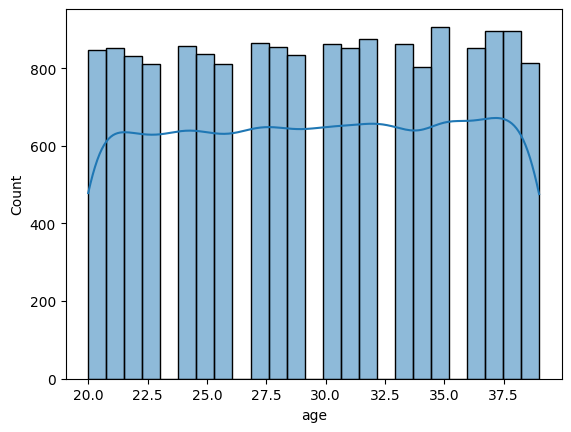

In [ ]:
#histogram
sns.histplot(data = df, x = "age", kde = True)

Null Values

In [ ]:
df.isnull()

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17699,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17700,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17701,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17702,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
rider_id,0
age,686
ratings,706
restaurant_latitude,1418
restaurant_longitude,1418
delivery_latitude,1418
delivery_longitude,1418
order_date,0
weather,212
traffic,206


In [ ]:
#duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
df.loc[df['age'].isnull(), 'age'] = 30

In [ ]:
df.age.isnull().sum()

np.int64(0)

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(26877, 26)

In [ ]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance'],
      dtype='object')

**Preprocessing**
- Column Drop
